In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/processed_data.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
# Display the first few rows of the dataset
print(data.head())


   Gender  Â ALT  AST  Â ALP  Total Bilirubin  Direct Bilirubin  \
0  Female     16   18    187              0.7               0.1   
1    Male     64  100    699             10.9               5.5   
2    Male     60   68    490              7.3               4.1   
3    Male     14   20    182              1.0               0.4   
4    Male     27   59    195              3.9               2.0   

   Total Protiens  Albumin  A/G Ratio  Target  
0             6.8      3.3       0.90       1  
1             7.5      3.2       0.74       1  
2             7.0      3.3       0.89       1  
3             6.8      3.4       1.00       0  
4             7.3      2.4       0.40       0  


In [ ]:
data.shape
data.size
data.count()

,0
Gender,27160
Â ALT,27160
AST,27160
Â ALP,27160
Total Bilirubin,27160
Direct Bilirubin,27160
Total Protiens,27160
Albumin,27160
A/G Ratio,27160
Target,27160


Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |     

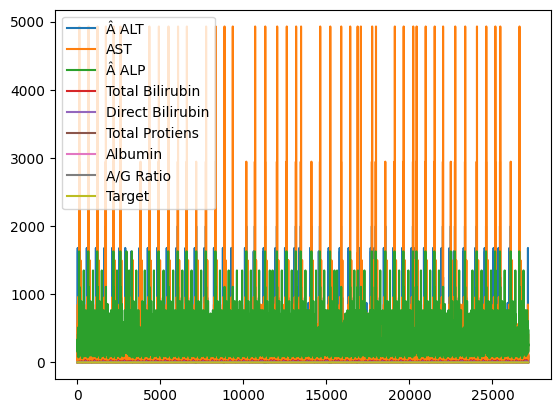

In [ ]:
normal_data = data[data['Target'] == 0] [0:27712]
moderate_data = data[data['Target'] == 1] [0:27712]
severe_data = data[data['Target'] == 2] [0:27712]

help(normal_data.plot())

In [ ]:
print(data.columns)

Index(['Gender', 'Â ALT', 'AST', 'Â ALP', 'Total Bilirubin',
       'Direct Bilirubin', 'Total Protiens', 'Albumin', 'A/G Ratio', 'Target'],
      dtype='object')


In [ ]:
data.dtypes

,0
Â ALT,int64
AST,int64
Â ALP,int64
Total Bilirubin,float64
Direct Bilirubin,float64
Total Protiens,float64
Albumin,float64
A/G Ratio,float64
Target,int64
Gender_Male,bool


In [ ]:
print(data.head())

   Â ALT  AST  Â ALP  Total Bilirubin  Direct Bilirubin  Total Protiens  \
0     16   18    187              0.7               0.1             6.8   
1     64  100    699             10.9               5.5             7.5   
2     60   68    490              7.3               4.1             7.0   
3     14   20    182              1.0               0.4             6.8   
4     27   59    195              3.9               2.0             7.3   

   Albumin  A/G Ratio  Target  Gender_Male  
0      3.3       0.90       1        False  
1      3.2       0.74       1         True  
2      3.3       0.89       1         True  
3      3.4       1.00       0         True  
4      2.4       0.40       0         True  


In [ ]:
value_counts = data['Target'].value_counts()
# Calculate the total number of records
total_records = len(data)

# Calculate the percentage for each class
percentages = (value_counts / total_records) * 100

# Print counts and percentages
print("Counts:\n", value_counts)
print("\nPercentages:\n", percentages)

Counts:
 Target
0    14869
1     9476
2     2815
Name: count, dtype: int64

Percentages:
 Target
0    54.745950
1    34.889543
2    10.364507
Name: count, dtype: float64


In [ ]:
value_counts = data['Gender_Male'].value_counts()
# Calculate the total number of records
total_records = len(data)

# Calculate the percentage for each class
percentages = (value_counts / total_records) * 100

# Print counts and percentages
print("Counts:\n", value_counts)
print("\nPercentages:\n", percentages)

Counts:
 Gender_Male
True     20036
False     7124
Name: count, dtype: int64

Percentages:
 Gender_Male
True     73.77025
False    26.22975
Name: count, dtype: float64


In [ ]:
# Train and test
X = data.drop('Target', axis=1)  # Features
y = data['Target']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

# Check the shape of the training set
X_train.shape #(22169, 7)
X_test.shape  #(5432, 7)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21728, 9)
X_test shape: (5432, 9)
y_train shape: (21728,)
y_test shape: (5432,)


In [ ]:

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Encode labels as integers
# Convert string labels to integer labels
y_train_int = y_train.astype(int)

# Now y_train_int contains integer labels (0, 1, and 2) suitable for multi-class classification

# Ensure X_train and y_train_int have compatible shapes
assert X_train.shape[0] == y_train_int.shape[0], "Number of samples in X_train and y_train_int should be the same"

# Convert boolean column to integer
X_train['Gender_Male'] = X_train['Gender_Male'].astype(int)

# Define the model
model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),

    # First convolutional block
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.1),

    # Second convolutional block
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.1),

    # Third convolutional block
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.1),

    # Fourth convolutional block
    layers.Conv1D(512, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dropout(0.1),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),

    # Output layer
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
272/272 [==============================] - 9s 13ms/step - loss: 0.8815 - accuracy: 0.5875 - val_loss: 0.8452 - val_accuracy: 0.5996
Epoch 2/50
272/272 [==============================] - 3s 10ms/step - loss: 0.8130 - accuracy: 0.6338 - val_loss: 0.7994 - val_accuracy: 0.6312
Epoch 3/50
272/272 [==============================] - 3s 10ms/step - loss: 0.7730 - accuracy: 0.6558 - val_loss: 0.7395 - val_accuracy: 0.6783
Epoch 4/50
272/272 [==============================] - 3s 10ms/step - loss: 0.7554 - accuracy: 0.6617 - val_loss: 0.7829 - val_accuracy: 0.6415
Epoch 5/50
272/272 [==============================] - 4s 14ms/step - loss: 0.7353 - accuracy: 0.6702 - val_loss: 0.7332 - val_accuracy: 0.6767
Epoch 6/50
272/272 [==============================] - 3s 10ms/step - loss: 0.6439 - accuracy: 0.7126 - val_loss: 1.0865 - val_accuracy: 0.6157
Epoch 7/50
272/272 [==============================] - 3s 10ms/step - loss: 0.4112 - accuracy: 0.8321 - val_loss: 0.6216 - val_accuracy: 0.7867

In [ ]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print classification report
report = classification_report(y_test_int, y_pred)
print(report)



170/170 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2952
           1       0.95      0.98      0.96      1917
           2       0.94      0.86      0.90       563

    accuracy                           0.97      5432
   macro avg       0.96      0.94      0.95      5432
weighted avg       0.97      0.97      0.97      5432



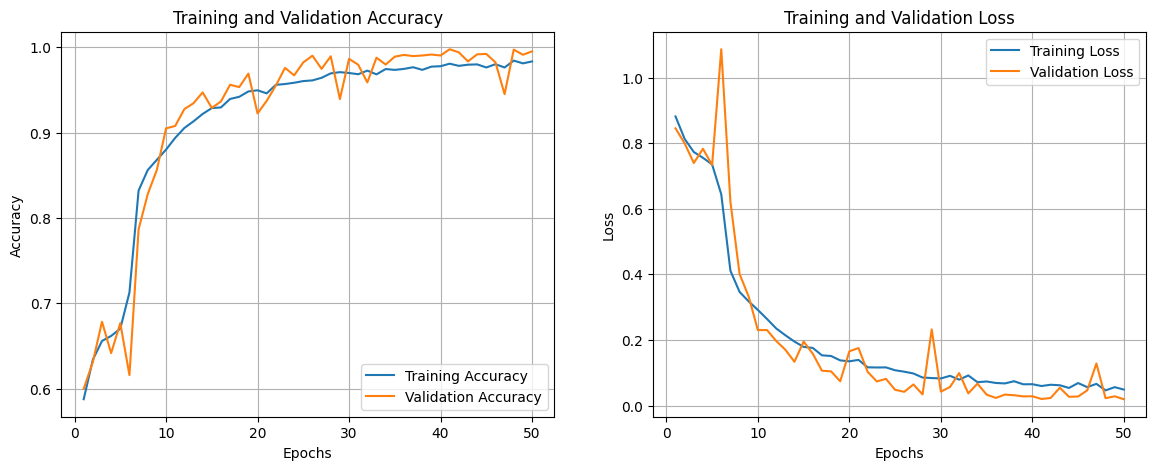

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.show()


170/170 [==============================] - 1s 4ms/step


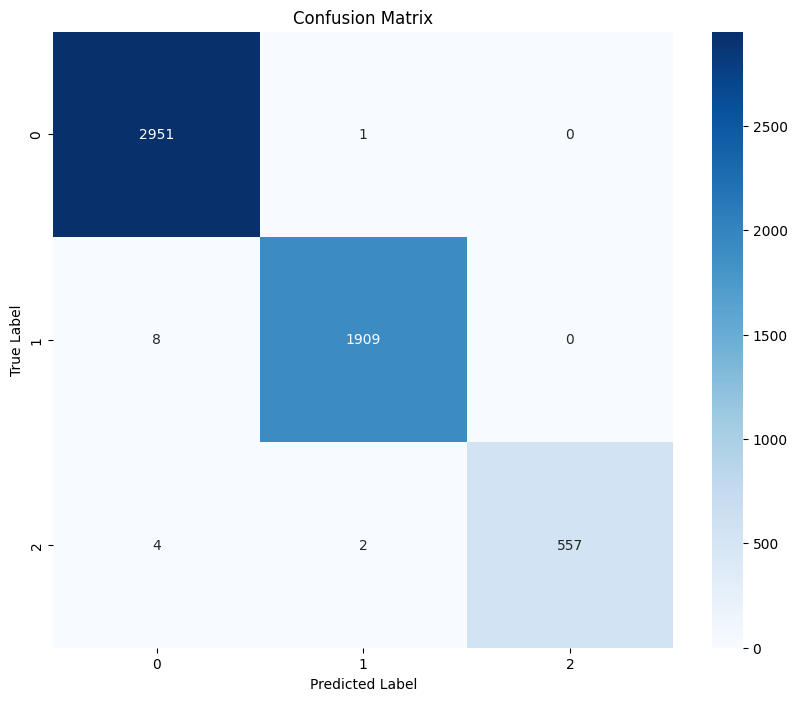

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your test labels
label_encoder = LabelEncoder()
y_test_int = label_encoder.fit_transform(y_test)

# Ensure the data type of X_test is float
X_test = X_test.astype(np.float32)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
import numpy as np

# Convert DataFrame to NumPy array
X_train_array = X_train.values

# Print the shape and data type of X_train_array
print("X_train shape:", X_train_array.shape)
print("X_train data type:", X_train_array.dtype)


X_train shape: (21728, 9)
X_train data type: object


In [ ]:
# Convert string labels to integer labels
y_train_int = y_train.astype(int)

# Now y_train_int contains integer labels (0, 1, and 2) suitable for multi-class classification

# Ensure X_train and y_train_int have compatible shapes
assert X_train.shape[0] == y_train_int.shape[0], "Number of samples in X_train and y_train_int should be the same"

# Convert boolean column to integer
X_train['Gender_Male'] = X_train['Gender_Male'].astype(int)

# Train the model
history = model.fit(X_train, y_train_int, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
544/544 [==============================] - 7s 6ms/step - loss: 1.1785 - accuracy: 0.5645 - val_loss: 0.8939 - val_accuracy: 0.6169
Epoch 2/30
544/544 [==============================] - 4s 7ms/step - loss: 0.9885 - accuracy: 0.5994 - val_loss: 0.9270 - val_accuracy: 0.6199
Epoch 3/30
544/544 [==============================] - 2s 4ms/step - loss: 0.8679 - accuracy: 0.6201 - val_loss: 0.8022 - val_accuracy: 0.6236
Epoch 4/30
544/544 [==============================] - 2s 4ms/step - loss: 0.7626 - accuracy: 0.6598 - val_loss: 0.8660 - val_accuracy: 0.6017
Epoch 5/30
544/544 [==============================] - 2s 4ms/step - loss: 0.7064 - accuracy: 0.6882 - val_loss: 0.7492 - val_accuracy: 0.6197
Epoch 6/30
544/544 [==============================] - 2s 4ms/step - loss: 0.6456 - accuracy: 0.7253 - val_loss: 0.6141 - val_accuracy: 0.7522
Epoch 7/30
544/544 [==============================] - 4s 6ms/step - loss: 0.5885 - accuracy: 0.7612 - val_loss: 0.5682 - val_accuracy: 0.7451
Epoch 

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import random
import pandas as pd
import numpy as np

# Convert DataFrame to NumPy array
X_train_array = X_train.values

# Convert boolean column to integer
X_train['Gender_Male'] = X_train['Gender_Male'].astype(int)


# Convert X and y to NumPy arrays if they are pandas DataFrame or Series
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

# Convert string labels to integer labels
y_train_int = y_train.astype(int)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of classes
num_classes = len(np.unique(y))

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True)

all_y_true = []
all_y_pred = []

for train, test in kfold.split(X, y):
    # Create the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])





In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_int, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
544/544 [==============================] - 2s 2ms/step - loss: 1.2223 - accuracy: 0.5780 - val_loss: 1.1635 - val_accuracy: 0.5476
Epoch 2/50
544/544 [==============================] - 1s 2ms/step - loss: 0.8923 - accuracy: 0.6264 - val_loss: 0.8178 - val_accuracy: 0.6070
Epoch 3/50
544/544 [==============================] - 1s 2ms/step - loss: 0.8198 - accuracy: 0.6378 - val_loss: 0.7632 - val_accuracy: 0.6558
Epoch 4/50
544/544 [==============================] - 1s 2ms/step - loss: 0.7819 - accuracy: 0.6506 - val_loss: 0.7553 - val_accuracy: 0.6659
Epoch 5/50
544/544 [==============================] - 1s 1ms/step - loss: 0.7347 - accuracy: 0.6646 - val_loss: 0.7064 - val_accuracy: 0.6815
Epoch 6/50
544/544 [==============================] - 1s 2ms/step - loss: 0.7173 - accuracy: 0.6694 - val_loss: 0.6845 - val_accuracy: 0.6981
Epoch 7/50
544/544 [==============================] - 1s 2ms/step - loss: 0.6757 - accuracy: 0.6850 - val_loss: 0.6577 - val_accuracy: 0.6979
Epoch 

In [ ]:
from sklearn.metrics import classification_report

    # Print classification report for the current fold
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

170/170 [==============================] - 0s 875us/step


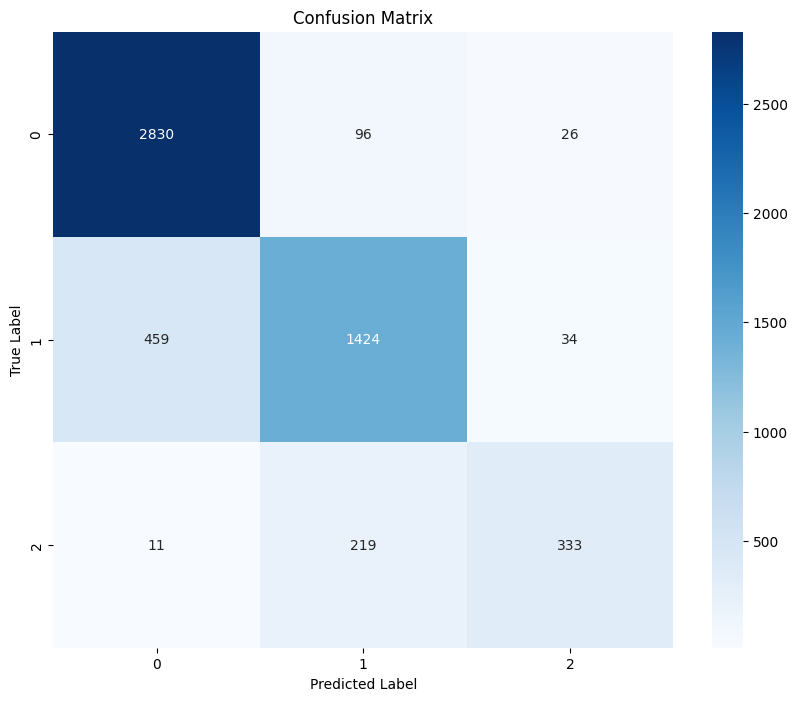

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your test labels
label_encoder = LabelEncoder()
y_test_int = label_encoder.fit_transform(y_test)

# Ensure the data type of X_test is float
X_test = X_test.astype(np.float32)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


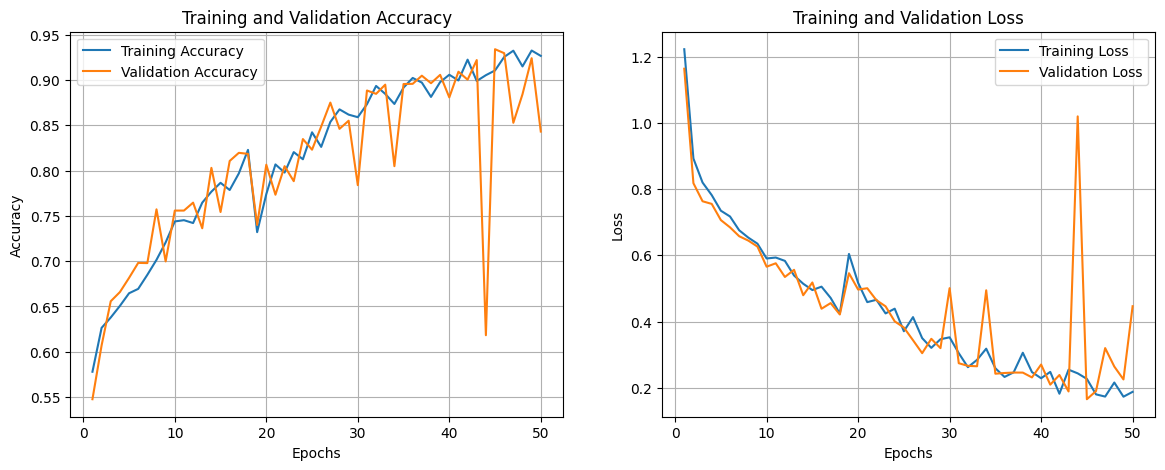

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train: (21728, 9)


NameError: name 'y_train_encoded' is not defined

In [ ]:
# Print the first few rows of X_train
print("First few rows of X_train:")
print(X_train.head())

# Print the first few rows of y_train_encoded
print("\nFirst few rows of y_train_encoded:")
print(y_train_encoded[:10])  # Print the first 10 elements

# Print the first few rows of X_test
print("\nFirst few rows of X_test:")
print(X_test.head())

# Print the first few rows of y_test_encoded
print("\nFirst few rows of y_test_encoded:")
print(y_test_encoded[:10])  # Print the first 10 elements

First few rows of X_train:
       Â ALT  AST  Â ALP  Total Bilirubin  Direct Bilirubin  Total Protiens  \
20015     62   55    365              2.7               1.2             6.0   
3848      20   17    171              0.6               0.1             5.4   
6536      62   88    470              1.4               0.7             5.6   
3740      45  111    190              4.0               1.9             5.2   
14943     22   28    195              1.0               0.3             5.8   

       Albumin  A/G Ratio  Gender_Male  
20015      2.4        0.6         True  
3848       2.5        0.8        False  
6536       2.5        0.8         True  
3740       1.5        0.4        False  
14943      2.6        0.8         True  

First few rows of y_train_encoded:


NameError: name 'y_train_encoded' is not defined

In [ ]:
print("Data type of X_train_np:", X_train_np.dtype)
print("Data type of y_train_encoded:", y_train_encoded.dtype)

NameError: name 'X_train_np' is not defined

In [ ]:
#check for overfitting train,validation split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = DecisionTreeClassifier()

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the training and validation sets
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Evaluate the performance on the training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy)

Training accuracy: 1.0
Validation accuracy: 1.0


In [ ]:
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Initialize the classifier
clf = DecisionTreeClassifier()
#defines the evaluation metric (e.g., accuracy)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Cross-validation scores: [1.         1.         1.         0.99981591 1.        ]
Mean accuracy: 0.9999631811487483
Standard deviation of accuracy: 7.363770250368162e-05


In [ ]:
#DecisionTreesClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing and training the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2952
           1       1.00      1.00      1.00      1917
           2       1.00      1.00      1.00       563

    accuracy                           1.00      5432
   macro avg       1.00      1.00      1.00      5432
weighted avg       1.00      1.00      1.00      5432



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with regularization (max_depth)
clf_regularized = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the regularized model on the training set
clf_regularized.fit(X_train, y_train)

# Predict classes for training and validation sets
y_train_pred = clf_regularized.predict(X_train)
y_val_pred = clf_regularized.predict(X_val)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Training accuracy (regularized):", train_accuracy)
print("Validation accuracy (regularized):", val_accuracy)


# Printing the classification report
print(classification_report(y_test, y_val_pred))



Training accuracy (regularized): 0.9662647275405007
Validation accuracy (regularized): 0.9641016200294551
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2952
           1       0.98      0.98      0.98      1917
           2       0.78      1.00      0.88       563

    accuracy                           0.96      5432
   macro avg       0.92      0.98      0.94      5432
weighted avg       0.97      0.96      0.97      5432



Training accuracy (regularized): 0.9662647275405007
Validation accuracy (regularized): 0.9641016200294551
Confusion Matrix:
[[2791   33  128]
 [   3 1883   31]
 [   0    0  563]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2952
           1       0.98      0.98      0.98      1917
           2       0.78      1.00      0.88       563

    accuracy                           0.96      5432
   macro avg       0.92      0.98      0.94      5432
weighted avg       0.97      0.96      0.97      5432



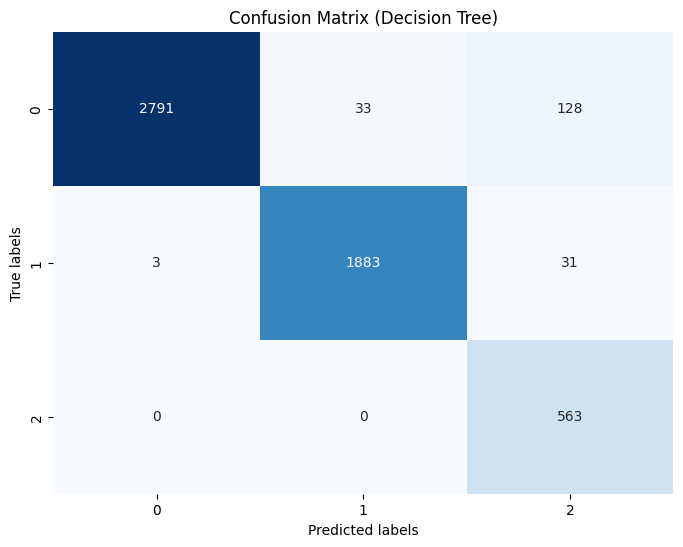

In [ ]:
#DT CM
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with regularization (max_depth)
clf_regularized = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the regularized model on the training set
clf_regularized.fit(X_train, y_train)

# Predict classes for training and validation sets
y_train_pred = clf_regularized.predict(X_train)
y_val_pred = clf_regularized.predict(X_val)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Training accuracy (regularized):", train_accuracy)
print("Validation accuracy (regularized):", val_accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles to the heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


In [ ]:
#RandomForest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can choose another strategy for imputation
    ('encoder', LabelEncoder())
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the Random Forest classifier with preprocessing
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9639175257731959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2952
           1       0.96      0.94      0.95      1917
           2       0.81      0.87      0.84       563

    accuracy                           0.96      5432
   macro avg       0.92      0.94      0.93      5432
weighted avg       0.97      0.96      0.96      5432



In [ ]:
#Regularization

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=1, max_depth=20, bootstrap=True, random_state=42)

# Adjust min_impurity_decrease and bootstrap as needed
clf_regularized_rf = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01, bootstrap=True, random_state=42)

# Train the regularized Random Forest model on the training set
clf_regularized_rf.fit(X_train, y_train)

# Predict classes for training and validation sets
y_train_pred = clf_regularized_rf.predict(X_train)
y_val_pred = clf_regularized_rf.predict(X_val)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Training accuracy (regularized Random Forest):", train_accuracy)
print("Validation accuracy (regularized Random Forest):", val_accuracy)


# Printing the classification report
print(classification_report(y_test, y_val_pred))

Training accuracy (regularized Random Forest): 0.9040408689248896
Validation accuracy (regularized Random Forest): 0.9037187039764359
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2952
           1       0.83      0.98      0.90      1917
           2       0.71      0.39      0.50       563

    accuracy                           0.90      5432
   macro avg       0.84      0.77      0.79      5432
weighted avg       0.90      0.90      0.90      5432



Training accuracy (regularized Random Forest): 0.9040408689248896
Validation accuracy (regularized Random Forest): 0.9037187039764359
Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2952
           1       0.83      0.98      0.90      1917
           2       0.71      0.39      0.50       563

    accuracy                           0.90      5432
   macro avg       0.84      0.77      0.79      5432
weighted avg       0.90      0.90      0.90      5432



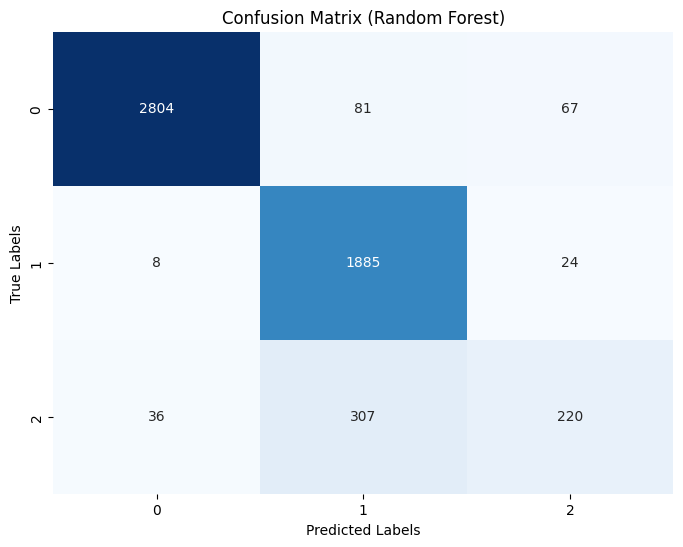

In [ ]:
#RF CM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with regularization
clf_regularized_rf = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01, bootstrap=True, random_state=42)

# Train the regularized Random Forest model on the training set
clf_regularized_rf.fit(X_train, y_train)

# Predict classes for training and validation sets
y_train_pred = clf_regularized_rf.predict(X_train)
y_val_pred = clf_regularized_rf.predict(X_val)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Training accuracy (regularized Random Forest):", train_accuracy)
print("Validation accuracy (regularized Random Forest):", val_accuracy)

# Print the classification report
print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [ ]:
#Best hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform randomized search to find the best hyperparameters
random_search.fit(X_train, y_train)

# best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the results
print("Best hyperparameters:", best_params)
print("Validation accuracy (best model):", val_accuracy)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Validation accuracy (best model): 1.0


In [ ]:
#XGBoost

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can choose another strategy for imputation
    ('encoder', LabelEncoder())
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
xgb_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))])

# Train the XGBoost classifier with preprocessing
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9639175257731959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2952
           1       0.96      0.94      0.95      1917
           2       0.81      0.87      0.84       563

    accuracy                           0.96      5432
   macro avg       0.92      0.94      0.93      5432
weighted avg       0.97      0.96      0.96      5432



Accuracy: 0.9639175257731959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2952
           1       0.96      0.94      0.95      1917
           2       0.81      0.87      0.84       563

    accuracy                           0.96      5432
   macro avg       0.92      0.94      0.93      5432
weighted avg       0.97      0.96      0.96      5432



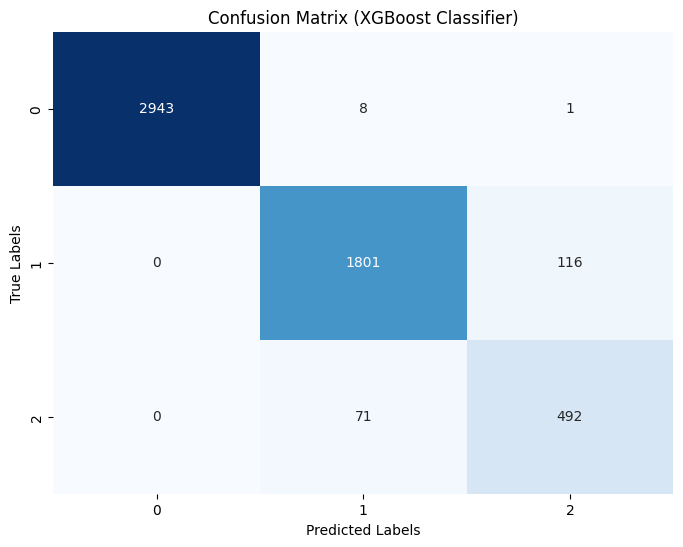

In [ ]:
#XGboost CM
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
xgb_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))])

# Train the XGBoost classifier with preprocessing
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()


In [ ]:
#LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardizing the features (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.71759941089838
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2952
           1       0.62      0.64      0.63      1917
           2       0.54      0.23      0.33       563

    accuracy                           0.72      5432
   macro avg       0.65      0.58      0.59      5432
weighted avg       0.71      0.72      0.70      5432



Accuracy: 0.71759941089838
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2952
           1       0.62      0.64      0.63      1917
           2       0.54      0.23      0.33       563

    accuracy                           0.72      5432
   macro avg       0.65      0.58      0.59      5432
weighted avg       0.71      0.72      0.70      5432



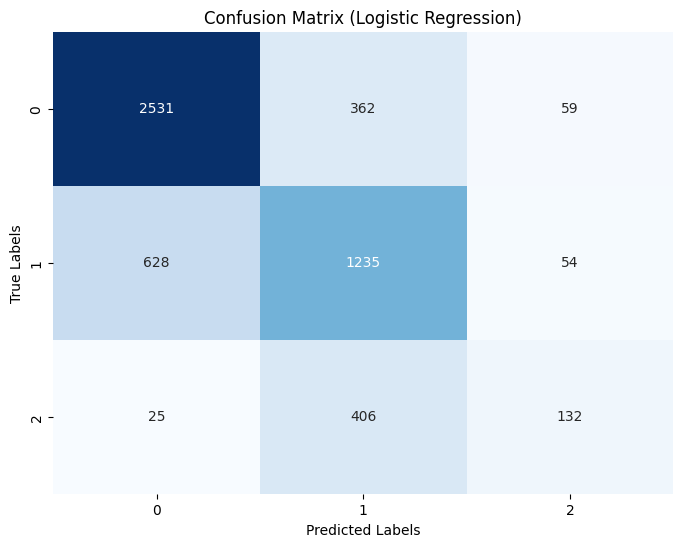

In [ ]:
#LR CM
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the features (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Accuracy: 0.7483431516936672
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2952
           1       0.74      0.65      0.69      1917
           2       0.40      0.64      0.49       563

    accuracy                           0.75      5432
   macro avg       0.67      0.71      0.68      5432
weighted avg       0.77      0.75      0.76      5432



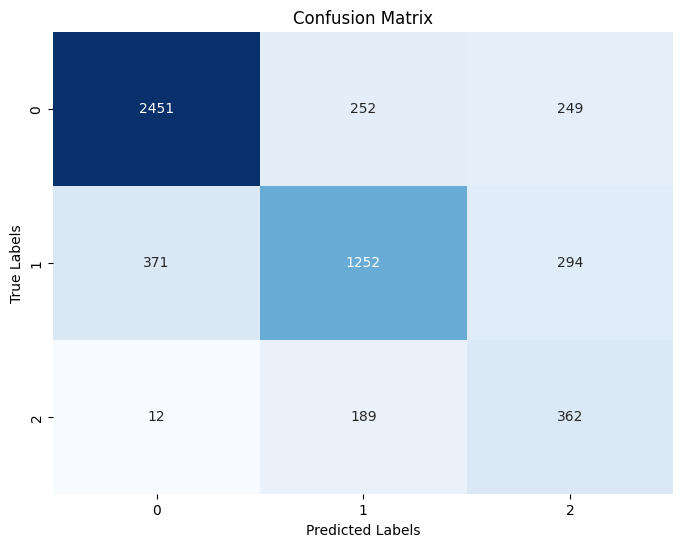

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the features (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model with hyperparameters
logreg = LogisticRegression(max_iter=2000, C=0.1, solver='saga', penalty='l2', class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


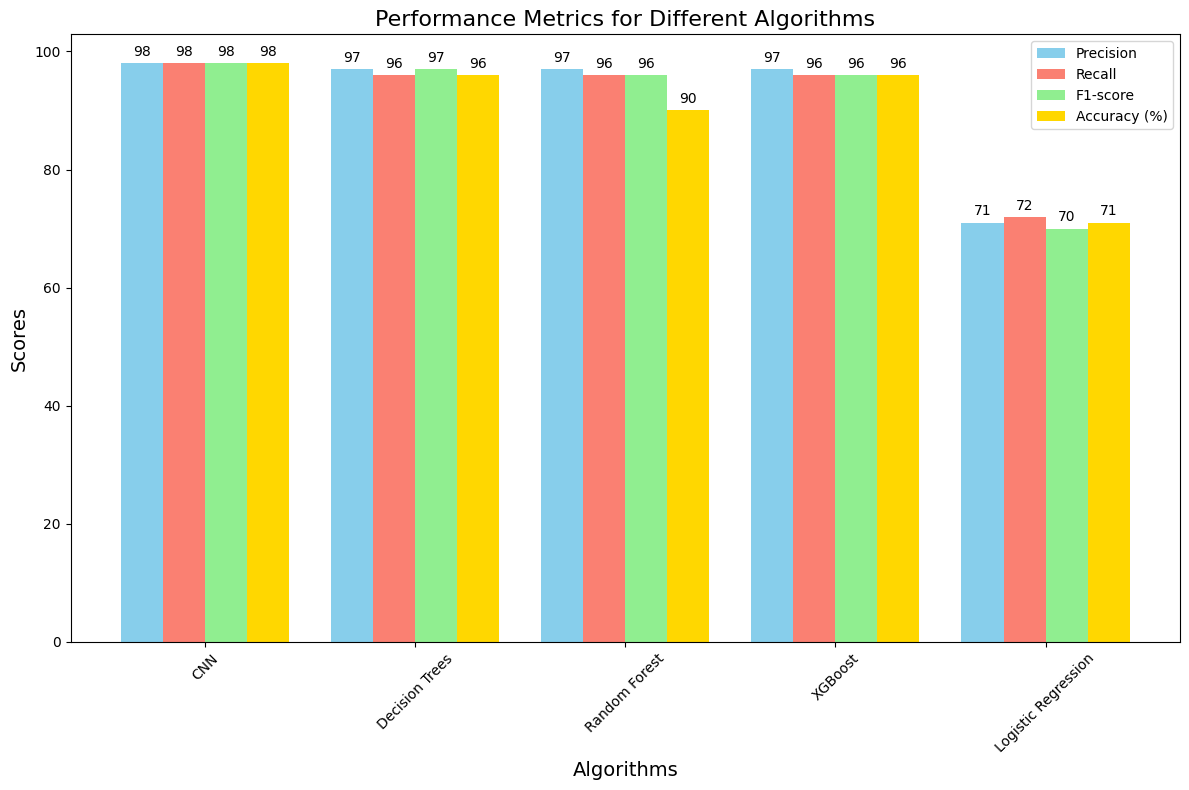

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
algorithms = ['CNN',  'Decision Trees', 'Random Forest', 'XGBoost', 'Logistic Regression']
precision = [98, 97, 97, 97, 71]
recall = [98, 96, 96, 96, 72]
f1_score = [98,  97, 96, 96, 70]
accuracy = [98, 96, 90, 96, 71]

# Creating positions for bars
bar_width = 0.2
index = np.arange(len(algorithms))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting bars
bar1 = ax.bar(index - bar_width, precision, bar_width, label='Precision', color='skyblue')
bar2 = ax.bar(index, recall, bar_width, label='Recall', color='salmon')
bar3 = ax.bar(index + bar_width, f1_score, bar_width, label='F1-score', color='lightgreen')
bar4 = ax.bar(index + 2*bar_width, accuracy, bar_width, label='Accuracy (%)', color='gold')

# Adding labels, title and legend
ax.set_xlabel('Algorithms', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Performance Metrics for Different Algorithms', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()

# Adding data labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Show plot
plt.tight_layout()
plt.show()

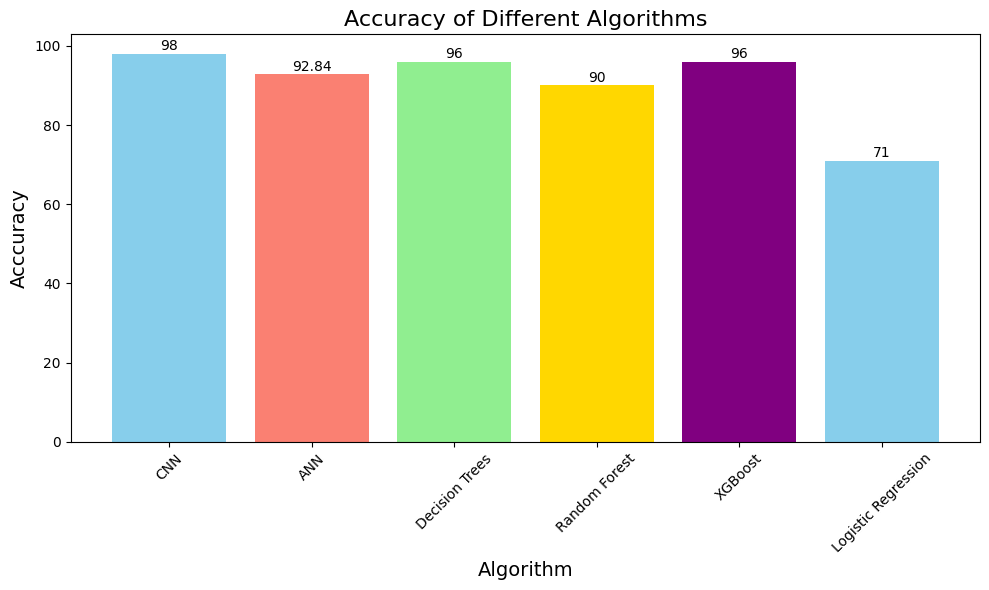

In [ ]:
import matplotlib.pyplot as plt

# Data
algorithms = ['CNN', 'ANN' , 'Decision Trees', 'Random Forest', 'XGBoost', 'Logistic Regression']
Accuracy = [98, 92.84, 96, 90, 96, 71]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(algorithms, Accuracy, color=['skyblue', 'salmon', 'lightgreen', 'gold', 'purple'])
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Acccuracy', fontsize=14)
plt.title('Accuracy of Different Algorithms', fontsize=16)

# Adding the precision values on top of each bar
for i, v in enumerate(Accuracy):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

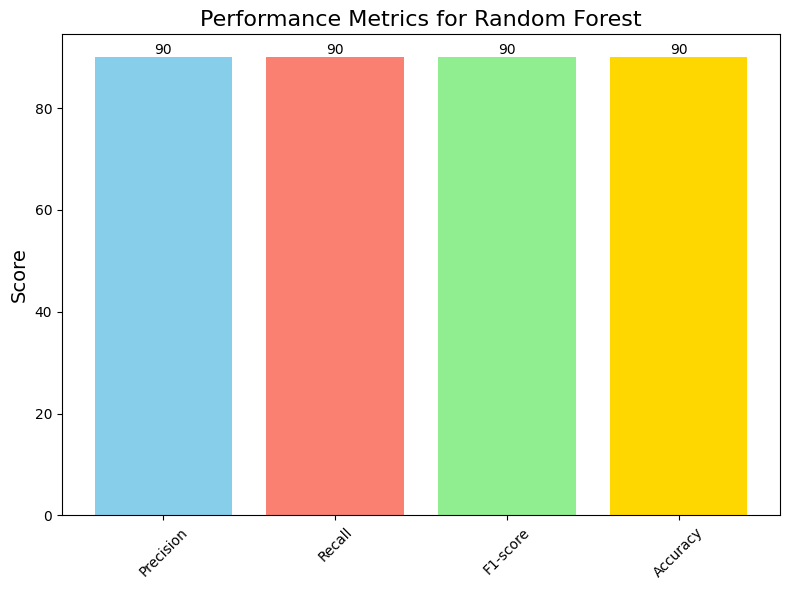

In [ ]:
import matplotlib.pyplot as plt

# Data
algorithm = 'Random Forest'
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
scores = [90, 90, 90, 90]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.ylabel('Score', fontsize=14)
plt.title('Performance Metrics for Random Forest', fontsize=16)

# Adding the scores on top of each bar
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

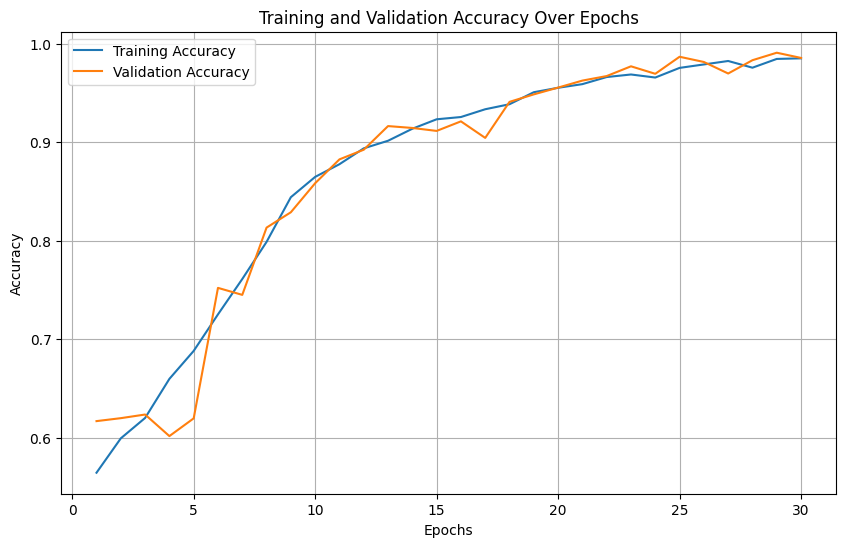

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values (example data)
accuracy = [0.5645, 0.5994, 0.6201, 0.6598, 0.6882, 0.7253, 0.7612, 0.7989, 0.8443, 0.8649,
            0.8778, 0.8939, 0.9016, 0.9138, 0.9234, 0.9257, 0.9336, 0.9387, 0.9509, 0.9554,
            0.9591, 0.9663, 0.9689, 0.9658, 0.9756, 0.9791, 0.9826, 0.9758, 0.9847, 0.9853]

val_accuracy = [0.6169, 0.6199, 0.6236, 0.6017, 0.6197, 0.7522, 0.7451, 0.8134, 0.8290, 0.8585,
                0.8827, 0.8925, 0.9165, 0.9146, 0.9116, 0.9213, 0.9045, 0.9411, 0.9487, 0.9556,
                0.9627, 0.9673, 0.9772, 0.9696, 0.9869, 0.9816, 0.9699, 0.9834, 0.9910, 0.9857]

# Epochs
epochs = range(1, 31)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()